# Overview-

The dataset used is of Jamboree. Jamboree is a company which helps students to get admission in top collages abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
Datset - The datset contains the unique record of each student. T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split,KFold
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_839_original_Jamboree_Admission.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Insight-No Null values in the data

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

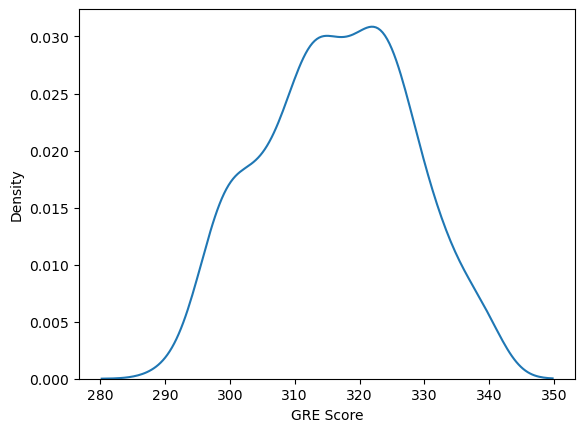

In [9]:
sns.kdeplot(data = df, x = 'GRE Score')

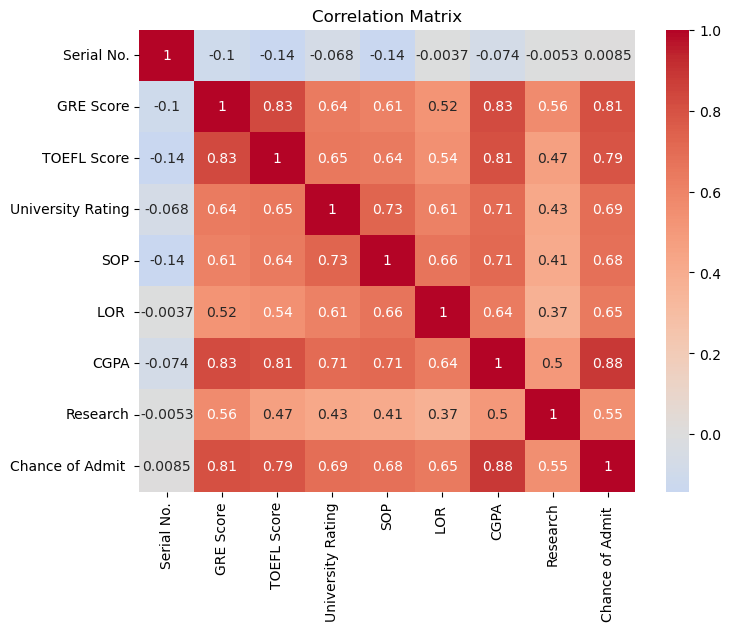

In [10]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

<font color="red">Insights-</font><br/
-We can see high coorelation betweeen many features therefore we will use Variance Inflation factor to check further which features to be removed so that there could be no multicollinearity between these features. <br>
-Also there is high correlation between our target feature and allother features which is good for linear regression.

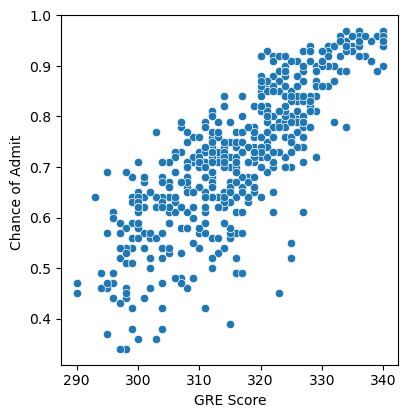

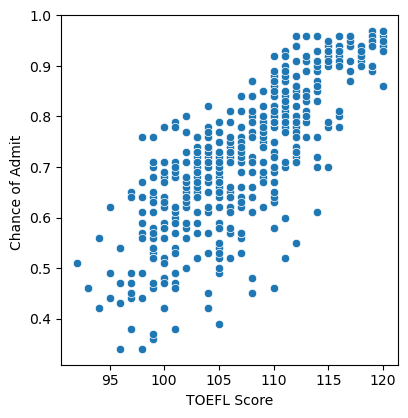

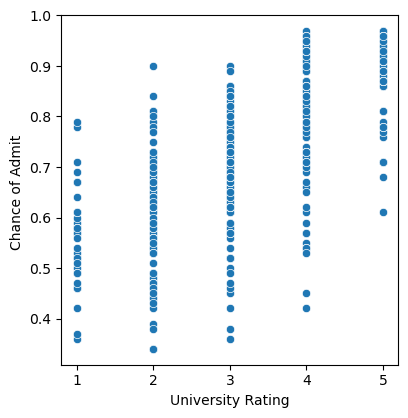

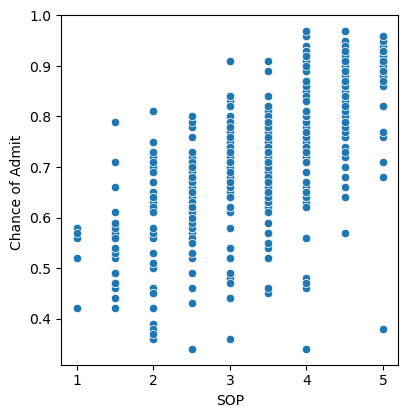

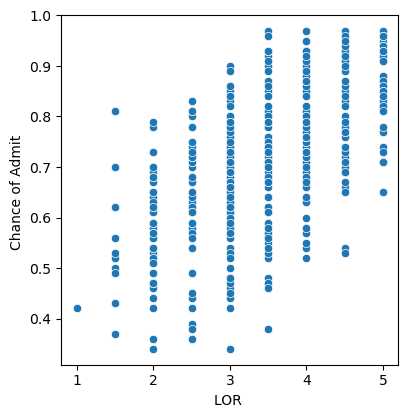

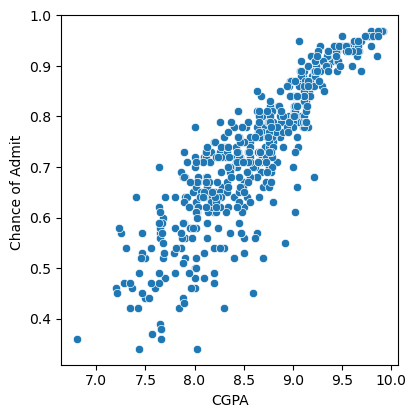

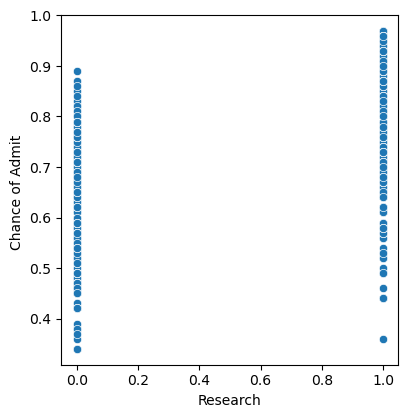

In [11]:
columns = df.columns[1:-1]
c = 1
for i in columns:
    plt.figure(figsize= (20,10))
    plt.subplot(2,4,c)
    sns.scatterplot(data = df,x = i , y = 'Chance of Admit ' )
    c+=1

In [27]:
columns = df.columns[1:-1]
columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

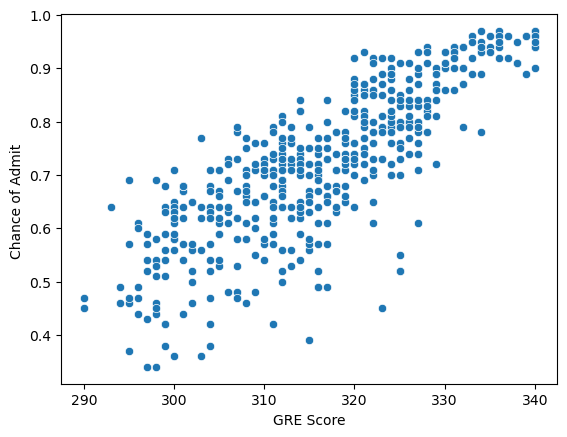

In [28]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'Chance of Admit ')

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
target = df['Chance of Admit ']

In [5]:
scaler = MinMaxScaler()

In [6]:
df_ = scaler.fit_transform(df)

In [7]:
df_ = pd.DataFrame(df_,columns = df.columns)

In [8]:
df_.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
X = df_.drop(['Chance of Admit ','Serial No.'], axis=1)

In [10]:
k_fold = KFold(n_splits =10)
r2_scores_=[]
for x,y in k_fold.split(X):
        x_train,x_val = X.iloc[x,:],X.iloc[y,:]
        y_train,y_val = target[x],target[y]
        model = LinearRegression()
        model.fit(x_train,y_train)
        val_prediction = model.predict(x_val)
        r2_scores_.append(r2_score(val_prediction,y_val))

In [11]:
np.mean(r2_scores_)

0.7650885148844572

In [39]:
model = LinearRegression()

In [40]:
model.fit(X,target)

LinearRegression()

In [41]:
predicted= model.predict(X)

In [43]:
r2_score(predicted,target)

0.783308066389333

# Assumption Checking

## Multicollineraity Check

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [294]:
vif = pd.DataFrame()
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,11.71
2,LOR,9.73
1,University Rating,8.98
3,Research,3.33


In [14]:
X_t = X.copy(deep = True)

In [19]:
X_t = X_t[['LOR ','University Rating','Research']]

In [295]:
X_t.drop('GRE Score',axis= 1,inplace =True)

In [296]:
k_fold = KFold(n_splits =10)
r2_scores_t=[]
for x,y in k_fold.split(X_t):
        x_train,x_val = X_t.iloc[x,:],X_t.iloc[y,:]
        y_train,y_val = target[x],target[y]
        model = LinearRegression()
        model.fit(x_train,y_train)
        val_prediction = model.predict(x_val)
        r2_scores_t.append(r2_score(val_prediction,y_val))

In [299]:
avg_r2_t =np.mean(r2_scores_t)
avg_r2_t

0.25272513080498776

In [272]:
def adj_r2(r2,X):
    return (1 - ((1-r2)*(len(X)-1))/(len(X)-X.shape[1]-1))

In [298]:
adj_r2(avg_r2_t,X_t)

0.24820532312840515

In [238]:
k_fold = KFold(n_splits =10)
r2_scores_t=[]
for x,y in k_fold.split(X):
        x_train,x_val = X.iloc[x,:],X.iloc[y,:]
        y_train,y_val = target[x],target[y]
        model = LinearRegression()
        model.fit(x_train,y_train)
        val_prediction = model.predict(x_val)
        r2_scores_.append(r2_score(val_prediction,y_val))

## Training data over removed columns

In [21]:
model_t = LinearRegression()

In [22]:
model_t.fit(X_t,target)

LinearRegression()

In [23]:
predicted_t = model_t.predict(X_t)

In [24]:
residuals_t = target- predicted_t

## Checking for normality of residuals

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

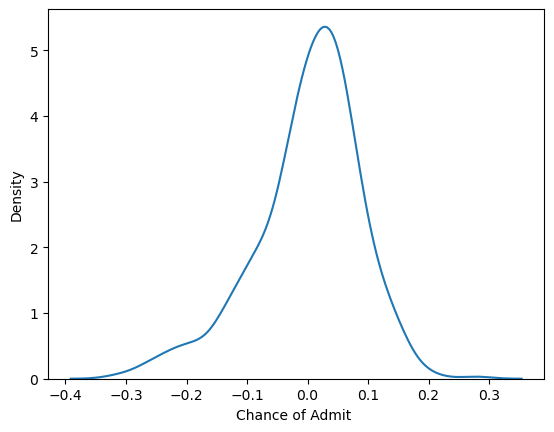

In [42]:
sns.kdeplot(residuals_t)

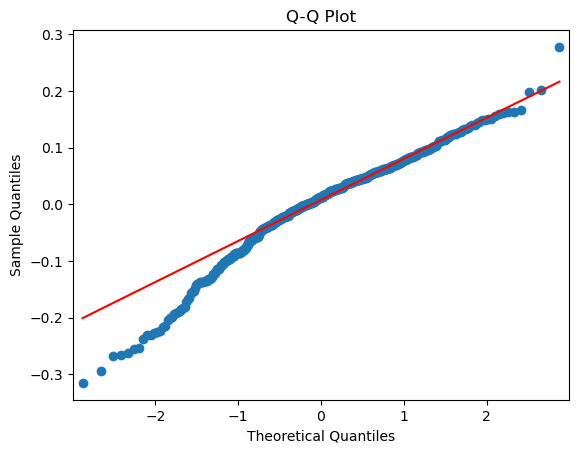

In [41]:
import statsmodels.api as sm
sm.qqplot(residuals_t,line = 'q')
plt.title('Q-Q Plot')
plt.show()

## Heteroscedasticity

<AxesSubplot:ylabel='Chance of Admit '>

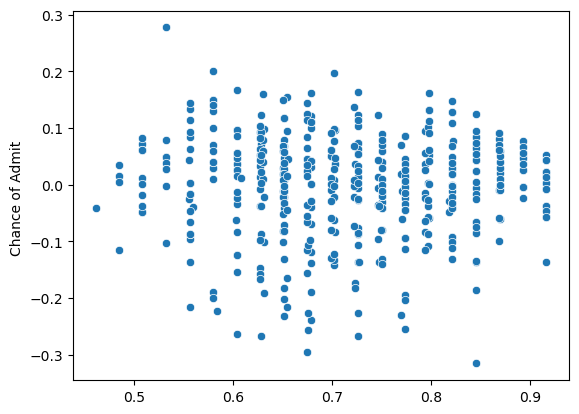

In [33]:
sns.scatterplot(x = predicted_t,y= residuals_t)

## Mean of Errors

In [40]:
np.mean(residuals_t)

-4.130029651605582e-17

Which is near to zero. Therefore it satisfy the assumption in linear regression that 

In [46]:
residuals = target-predicted

In [47]:
residuals.mean(),residuals.median()

(-5.928590951498336e-17, 0.009191363903162608)

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

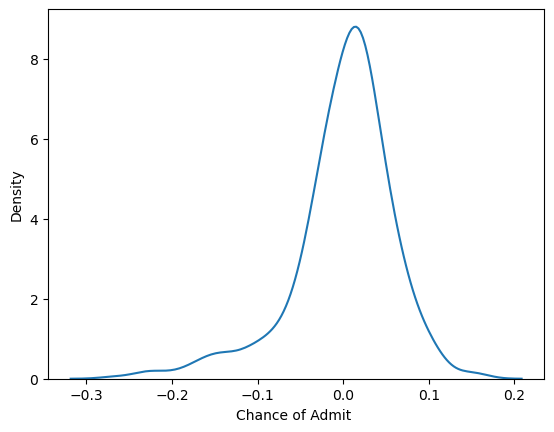

In [48]:
sns.kdeplot(target-predicted)

In [ ]:
sns.scatterplot(x=predicted-target,y = target)

In [47]:
import numpy as np
from scipy import stats

# Generate some example data (replace this with your actual data)


# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(residuals_t)

# Set significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value > alpha:
    print("Data follows a normal distribution (fail to reject H0)")
else:
    print("Data does not follow a normal distribution (reject H0)")

Data does not follow a normal distribution (reject H0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some example data (replace this with your actual data)
data = np.random.normal(loc=0, scale=1, size=100)

# Create a Q-Q plot
stats.probplot(target-predicted, dist="norm", plot=plt)

# Add a reference line for normal distribution
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

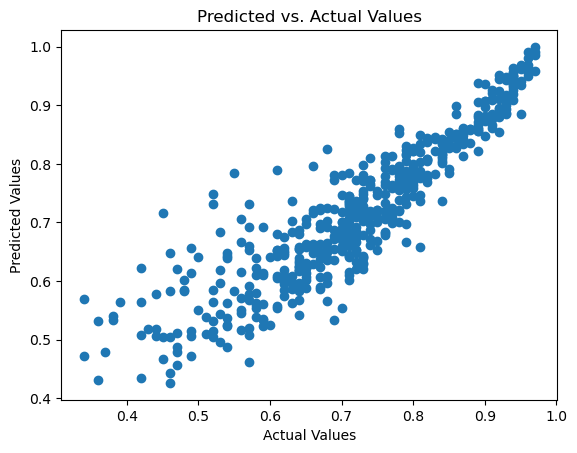

In [49]:
plt.scatter(target,predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [50]:
data = pd.DataFrame({"features":columns,"coeff":model.coef_})

In [51]:
data.index = data['features']

In [52]:
data.drop('features',axis = 1,inplace = True)

<AxesSubplot:ylabel='features'>

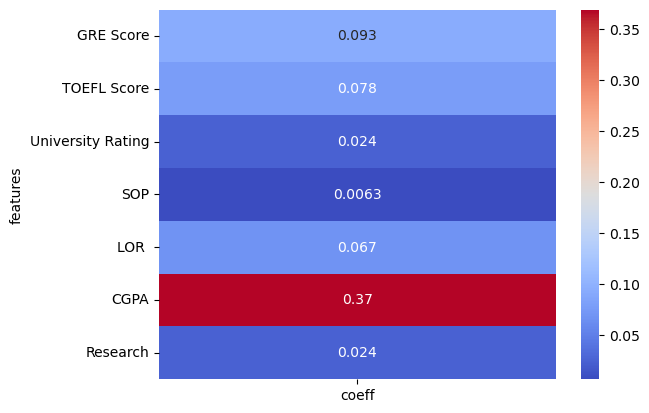

In [53]:
sns.heatmap(data,annot = True,cmap = 'coolwarm')